### Markov Chain Monte Carlo

Imagine that you lost your house key and you are looking for it.

Here, you always keep your keys in either your pants pocket, the drawer in the office, or the mail box in your house (location A, B, and C). <br>

You also know how likely you move the key from one location to another. <br>
For example, you are more likely to move from the drawer in the office to your pants pocket than <br>
from the drawer in the office to the mail box in your house. <br>

from/to |A  |B  |C 
--------|---|---|--- 
A       |0.3|0.5|0.2   
B       |0.6|0.1|0.3    
C       |0.7|0.2|0.1   


Where will you find the key most likley?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use("ggplot")
np.random.seed(123)

In [6]:
tpm = np.zeros([3,3])

In [9]:
# from A (pocket) to X
tpm[0,0] = 0.3
tpm[0,1] = 0.5
tpm[0,2] = 0.2

# from B (drawer) to X 
tpm[1,0] = 0.6
tpm[1,1] = 0.1
tpm[1,2] = 0.3

# from C (mail box) to X
tpm[2,0] = 0.7
tpm[2,1] = 0.2
tpm[2,2] = 0.1

tpm

array([[0.3, 0.5, 0.2],
       [0.6, 0.1, 0.3],
       [0.7, 0.2, 0.1]])

In [11]:
num_monte_carlo_step = 400
current_state = 0 # start from pocket
history_state = [current_state]

for i in range(num_monte_carlo_step):
    # Update location based on tpm.
    current_location = np.random.choice(3,1, p=tpm[current_state, :])
    current_state = current_location[0]
    history_state.append(current_state)
    
df = pd.DataFrame(history_state)    

([<matplotlib.axis.YTick at 0x7f72be8c4a60>,
 [Text(0, 0, 'pocket'), Text(0, 1, 'mail box'), Text(0, 2, 'drawer')])

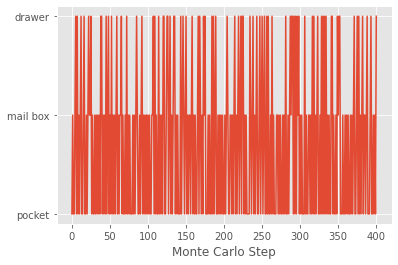

In [18]:
plt.plot(df[0])
plt.xlabel('Monte Carlo Step')
plt.yticks([0,1,2], {'pocket', 'drawer', 'mail box'})

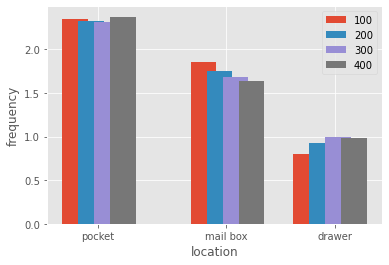

In [57]:
num_plot = 5
for iPlot in range(1,num_plot):
    this_label = str(100*iPlot)
    plt.hist(df[0][:100*iPlot] + 0.125*iPlot, density=True, label=this_label)
    plt.xlabel('location')
    plt.xticks([0.4, 1.4, 2.25], {'pocket', 'drawer', 'mail box'})
    plt.ylabel('frequency')
    plt.legend()

In [38]:
df[0][:100*iPlot]

0      0
1      1
2      0
3      0
4      1
      ..
295    0
296    2
297    1
298    2
299    0
Name: 0, Length: 300, dtype: int64

### [Detailed balance wiki](https://en.wikipedia.org/wiki/Detailed_balance)

There are some transition probability 